In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
field_names = [
    'response_hostname',
    'client_latency_ms',
    'version', 'date',
    'response_uuid',
    'response_start_time_sec',
    'response_function_latency_ms',
    'response_memory_request',
    'response_memory_usage_mb',
    'response_sleep_delay_ms',
    'response_load_time_ms',
    'response_load_request',
    'response_load_calibration'
]
dfs = []
filename = "2023-02-10_test"
for i in range(1,3):
    data_file = f"../data/{filename}{i}.csv"
    dfs.append(pd.read_csv(data_file, names=field_names))
df = pd.concat(dfs)
df.head()

,response_hostname,client_latency_ms,version,date,response_uuid,response_start_time_sec,response_function_latency_ms,response_memory_request,response_memory_usage_mb,response_sleep_delay_ms,response_load_time_ms,response_load_request,response_load_calibration
0,load-model-service-784886b884-csg48,416.037798,0.1.0,2023-02-10T20:52,ef6b6679-b38b-4f6a-ad15-8c8a1a453c4d,1.676062e+09,376.046181,150,189.769531,200,19.847155,6,15000
1,load-model-service-784886b884-cxvbx,437.019110,0.1.0,2023-02-10T20:52,3c7f5dce-7fba-440f-8f8b-af0b1e77bca3,1.676062e+09,401.492119,150,189.894531,200,19.296646,6,15000
2,load-model-service-784886b884-jcr4j,477.202892,0.1.0,2023-02-10T20:52,d6e2f969-0d6e-4ae0-8ca4-6aa0739034fd,1.676062e+09,449.274778,150,189.824219,200,15.420914,6,15000
3,load-model-service-784886b884-w87b4,459.963083,0.1.0,2023-02-10T20:52,e751553d-23f9-4bc2-a5c9-122089261fcb,1.676062e+09,379.705429,150,189.859375,200,13.380766,6,15000
4,load-model-service-784886b884-w87b4,511.493921,0.1.0,2023-02-10T20:52,81bf944b-daa2-4c4b-afda-529b083f1201,1.676062e+09,390.673637,150,189.859375,200,13.347626,6,15000


In [3]:
df.describe()

,client_latency_ms,response_start_time_sec,response_function_latency_ms,response_memory_request,response_memory_usage_mb,response_sleep_delay_ms,response_load_time_ms,response_load_request,response_load_calibration
count,1859.000000,1.859000e+03,1859.000000,1859.0,1859.000000,1859.0,1859.000000,1859.0,1859.0
mean,491.895724,1.676063e+09,393.060450,150.0,190.032240,200.0,16.043021,6.0,15000.0
std,119.689738,2.956933e+02,35.717433,0.0,0.249431,0.0,3.881027,0.0,0.0
min,389.874935,1.676062e+09,371.681213,150.0,189.769531,200.0,12.872458,6.0,15000.0
25%,412.216425,1.676063e+09,380.320907,150.0,189.875000,200.0,13.489604,6.0,15000.0
50%,444.655895,1.676063e+09,385.496855,150.0,189.937500,200.0,13.978481,6.0,15000.0
75%,515.988946,1.676063e+09,392.845631,150.0,189.996094,200.0,18.362999,6.0,15000.0
max,1225.023031,1.676063e+09,1129.570007,150.0,190.625000,200.0,80.584764,6.0,15000.0


array([[<AxesSubplot: title={'center': 'client_latency_ms'}>]],
      dtype=object)

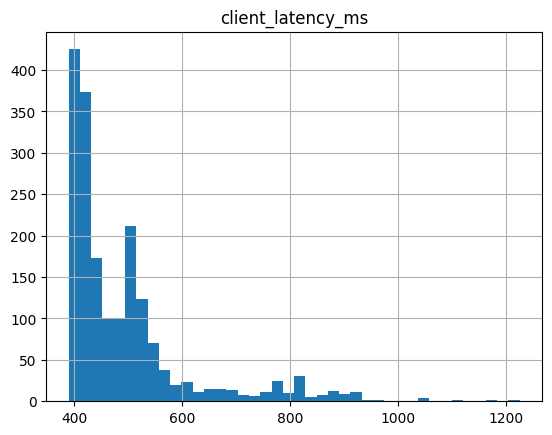

In [4]:
df.hist("client_latency_ms", bins=40)

array([[<AxesSubplot: title={'center': 'response_function_latency_ms'}>]],
      dtype=object)

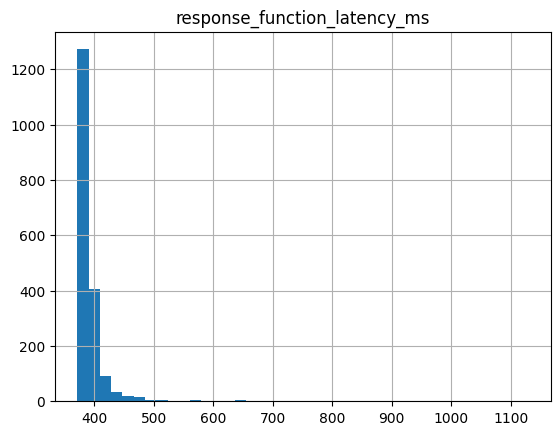

In [5]:
df.hist("response_function_latency_ms", bins=40)

array([[<AxesSubplot: title={'center': 'response_load_time_ms'}>]],
      dtype=object)

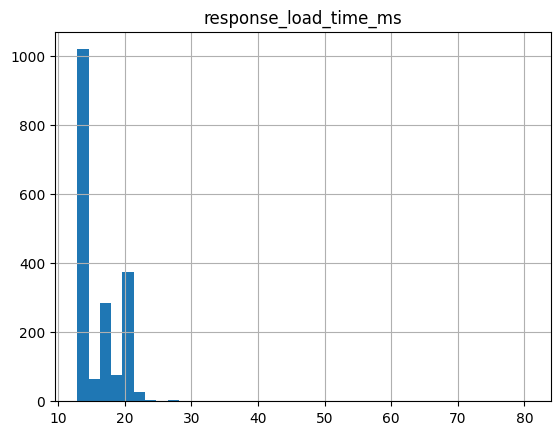

In [6]:
df.hist("response_load_time_ms", bins=40)

<AxesSubplot: xlabel='buckets'>

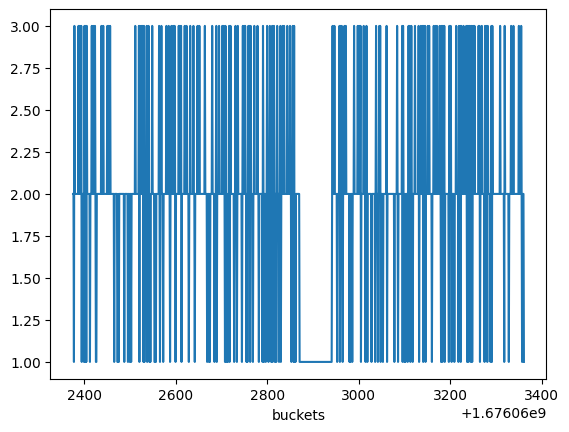

In [7]:
df["buckets"] = df['response_start_time_sec'].apply(lambda x: int(x))
dfxaction = df.groupby('buckets').size()
dfxaction.plot(x='response_start_time_sec', y=0)

In [8]:
dfxaction.head(19)

buckets
1676062376    2
1676062377    2
1676062378    1
1676062379    3
1676062380    2
1676062381    2
1676062382    2
1676062383    2
1676062384    2
1676062385    2
1676062386    2
1676062387    2
1676062388    3
1676062389    2
1676062390    2
1676062391    3
1676062392    2
1676062393    2
1676062394    3
dtype: int64

## Prometheus Data

In [1]:
import notebook_libs.prometheus as prom

In [2]:
q = 'rate(container_cpu_usage_seconds_total{pod=~"load-model-service-.*"}[1m])[20m:1m]'

In [3]:
q = 'rate(container_memory_usage_bytes{pod=~"load-model-service-.*"}[1m])[20m:1m]'

In [4]:
#prom.query_prometheus(q)

In [5]:
dfs = prom.prometheus_vector_series(prom.query_prometheus(q))

In [6]:
print(dfs)

{'load-model-service-784886b884-w87b4':        timestamp  value
0   1.676064e+09    0.0
1   1.676064e+09    0.0
2   1.676064e+09    0.0
3   1.676064e+09    0.0
4   1.676064e+09    0.0
5   1.676065e+09    0.0
6   1.676065e+09    0.0
7   1.676065e+09    0.0
8   1.676065e+09    0.0
9   1.676065e+09    0.0
10  1.676065e+09    0.0
11  1.676065e+09    0.0
12  1.676065e+09    0.0
13  1.676065e+09    0.0
14  1.676065e+09    0.0
15  1.676065e+09    0.0
16  1.676065e+09    0.0
17  1.676065e+09    0.0
18  1.676065e+09    0.0
19  1.676065e+09    0.0, 'load-model-service-784886b884-cxvbx':        timestamp  value
0   1.676064e+09    0.0
1   1.676064e+09    0.0
2   1.676064e+09    0.0
3   1.676064e+09    0.0
4   1.676064e+09    0.0
5   1.676065e+09    0.0
6   1.676065e+09    0.0
7   1.676065e+09    0.0
8   1.676065e+09    0.0
9   1.676065e+09    0.0
10  1.676065e+09    0.0
11  1.676065e+09    0.0
12  1.676065e+09    0.0
13  1.676065e+09    0.0
14  1.676065e+09    0.0
15  1.676065e+09    0.0
16  1.67

load-model-service-784886b884-w87b4
       timestamp  value
0   1.676064e+09    0.0
1   1.676064e+09    0.0
2   1.676064e+09    0.0
3   1.676064e+09    0.0
4   1.676064e+09    0.0
5   1.676065e+09    0.0
6   1.676065e+09    0.0
7   1.676065e+09    0.0
8   1.676065e+09    0.0
9   1.676065e+09    0.0
10  1.676065e+09    0.0
11  1.676065e+09    0.0
12  1.676065e+09    0.0
13  1.676065e+09    0.0
14  1.676065e+09    0.0
15  1.676065e+09    0.0
16  1.676065e+09    0.0
17  1.676065e+09    0.0
18  1.676065e+09    0.0
19  1.676065e+09    0.0
load-model-service-784886b884-cxvbx
       timestamp  value
0   1.676064e+09    0.0
1   1.676064e+09    0.0
2   1.676064e+09    0.0
3   1.676064e+09    0.0
4   1.676064e+09    0.0
5   1.676065e+09    0.0
6   1.676065e+09    0.0
7   1.676065e+09    0.0
8   1.676065e+09    0.0
9   1.676065e+09    0.0
10  1.676065e+09    0.0
11  1.676065e+09    0.0
12  1.676065e+09    0.0
13  1.676065e+09    0.0
14  1.676065e+09    0.0
15  1.676065e+09    0.0
16  1.676065e+09

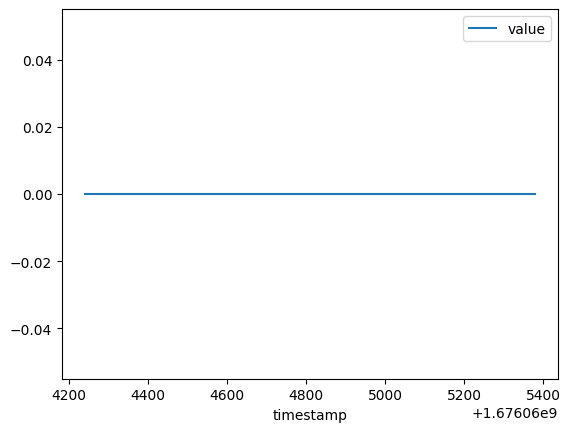

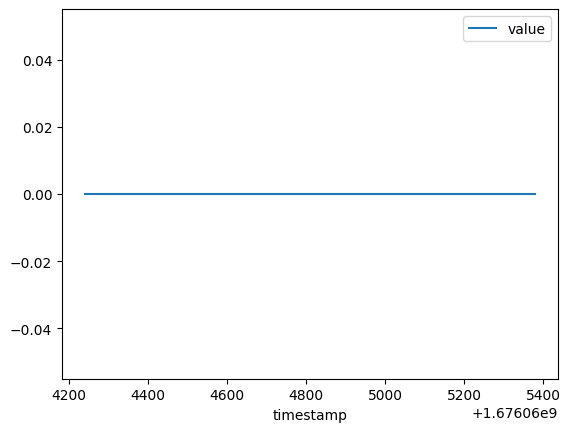

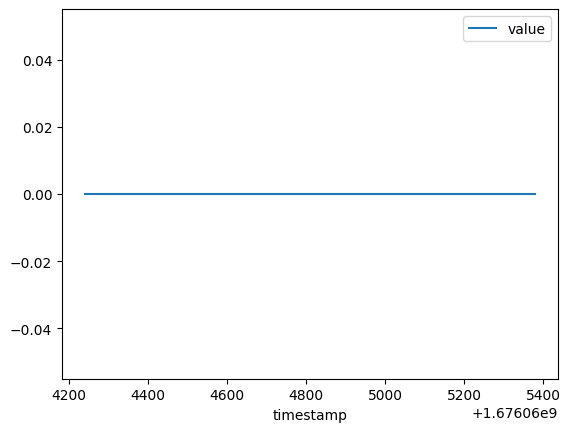

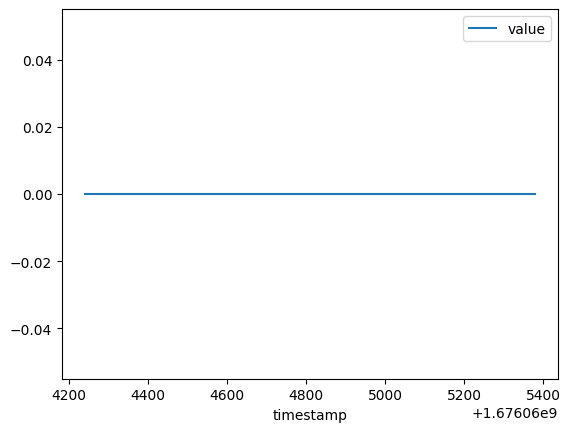

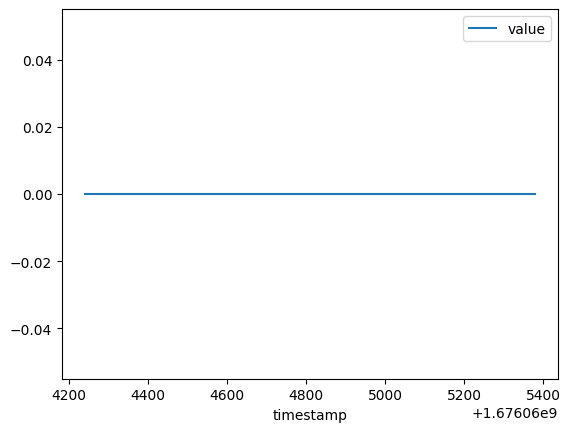

In [7]:
pods = list(dfs.keys())
for x in pods:
    print(x)
    print(dfs[x])
    dfs[x].plot(x="timestamp", y="value")
